In [1]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

from util import util
from data import base_dataset
from scipy.ndimage.interpolation import rotate
from data.image_folder import make_dataset
from skimage import io 
import stackview
import numpy as np
import matplotlib.pyplot as plt


/tmp/ipykernel_4092679/2995932685.py:9: DeprecationWarning: Please import `rotate` from the `scipy.ndimage` namespace; the `scipy.ndimage.interpolation` namespace is deprecated and will be removed in SciPy 2.0.0.
  from scipy.ndimage.interpolation import rotate


In [2]:
GT_path = '/scratch/park/data/simulation_data/haystack/6000-lines-blurred-by-gaublur-std-4/GT'
source_path = '/scratch/park/data/simulation_data/haystack/6000-lines-blurred-by-gaublur-std-4/blurred'
output_path = '/scratch/park/results/DeepClarity/Simulation_UNET-DLG-5-lvl_exp_241020-233715/test_23269_iter23269'
GT_dir = make_dataset(GT_path)[0]
GT_vol = io.imread(GT_dir)

output_dir = make_dataset(output_path)[0]
output_vol = io.imread(output_dir)

source_dir = make_dataset(source_path)[0]
source_vol = io.imread(source_dir)

In [3]:
data_range = 2**16-1
psnr_source = util.get_psnr(source_vol, GT_vol, data_range)
print (psnr_source)

21.88501164219099


In [4]:
source_mip = np.amax(source_vol[500:520,:,:],axis=0)
output_mip = np.amax(output_vol[500:520,:,:],axis=0)
gt_mip = np.amax(GT_vol[500:520,:,:],axis=0)

print (source_mip.shape)

(700, 700)


In [5]:
source_psnr_list_xy = []
output_psnr_list_xy = []
for i in range(50):
    start_index = np.random.randint(1,source_vol.shape[0]-20)
    end_index = start_index + 20 

    source_mip = np.amax(source_vol[start_index:end_index,:,:], axis=0)
    output_mip =  np.amax(output_vol[start_index:end_index,:,:], axis=0)
    gt_mip = np.amax(GT_vol[start_index:end_index,:,:], axis=0)

    data_range = 2**16-1
    psnr_source = util.get_psnr(source_mip, gt_mip, data_range)
    psnr_output = util.get_psnr(output_mip, gt_mip, data_range)
    source_psnr_list_xy.append(psnr_source)
    output_psnr_list_xy.append(psnr_output)

In [6]:
source_psnr_list_xz = []
output_psnr_list_xz = []
for i in range(50):
    start_index = np.random.randint(1,source_vol.shape[0]-20)
    end_index = start_index + 20 

    source_mip = np.amax(source_vol[:,start_index:end_index,:], axis=1)
    output_mip =  np.amax(output_vol[:,start_index:end_index,:], axis=1)
    gt_mip = np.amax(GT_vol[:, start_index:end_index,:], axis=1)

    data_range = 2**16-1
    psnr_source = util.get_psnr(source_mip, gt_mip, data_range)
    psnr_output = util.get_psnr(output_mip, gt_mip, data_range)
    source_psnr_list_xz.append(psnr_source)
    output_psnr_list_xz.append(psnr_output)

In [7]:
source_mip.shape

(700, 700)

/tmp/ipykernel_4092679/1598304942.py:4: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=['Input lateral', 'Input axial', 'Output lateral', 'output axial'])


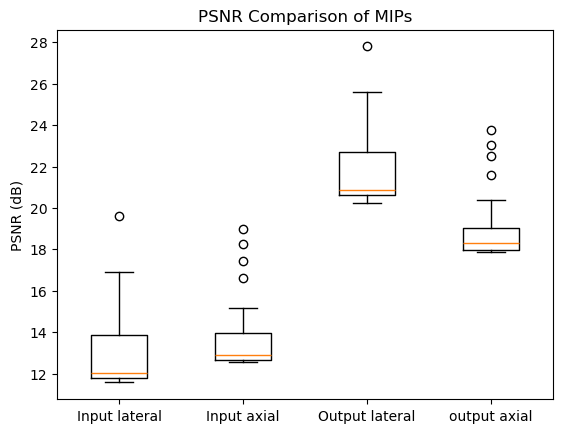

In [13]:
data = [source_psnr_list_xy, source_psnr_list_xz, output_psnr_list_xy, output_psnr_list_xz]

# Create the box plot
plt.boxplot(data, labels=['Input lateral', 'Input axial', 'Output lateral', 'output axial'])

# Add a title and labels
plt.title('PSNR Comparison of MIPs')
plt.ylabel('PSNR (dB)')
plt.savefig('boxplot_simulation.png', dpi=300)

# Show the plot
plt.show()


In [9]:
def calculate_psnr(vol, GT_vol):
    source_psnr_list = []
    for i in range(20):
        start_index = np.random.randint(1,source_vol.shape[0]-20)
        end_index = start_index + 20 

        source_mip = np.amax(source_vol[start_index:end_index,:,:], axis=0)
        gt_mip = np.amax(GT_vol[start_index:end_index,:,:], axis=0)

        data_range = 2**16-1
        psnr_output = util.get_psnr(test_mip, gt_mip, data_range)
        psnr_list.append(psnr_output)
        
    return psnr_list


In [10]:
source_pnsr_list = calculate_psnr(source_vol, GT_vol)


NameError: name 'test_mip' is not defined

In [ ]:
data_range = 2**16-1
psnr_output = util.get_psnr(output_mip, gt_mip, data_range)
print (psnr_output)

In [14]:
data_range = 2**16-1
psnr_output = util.get_psnr(output_mip, gt_mip, data_range)
print (psnr_output)

20.900838042588646


In [6]:
data_range = 2**16-1
psnr_output = util.get_psnr(output_vol, GT_vol, data_range)
print (psnr_output)

24.901185423851686


In [7]:
stackview.slice(output_vol, continuous_update=True)

In [8]:
stackview.slice(source_vol, continuous_update=True)